### 1. Data Exploration and Preprocessing

#1.1 Load and Inspect Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Load dataset
df = pd.read_csv(r"C:\Users\DELL\Downloads\MLE-Assignment.csv")
# Basic inspection
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 450 entries, hsi_id to vomitoxin_ppb
dtypes: float64(449), object(1)
memory usage: 1.7+ MB
None
                0           1           2           3           4           5  \
count  500.000000  500.000000  500.000000  500.000000  500.000000  500.000000   
mean     0.443118    0.440761    0.433814    0.426122    0.418990    0.412432   
std      0.044719    0.045520    0.045764    0.046070    0.045405    0.044727   
min      0.311182    0.295321    0.284064    0.282054    0.296702    0.286860   
25%      0.410456    0.404310    0.397038    0.389029    0.382102    0.377157   
50%      0.449105    0.442651    0.434215    0.425074    0.417075    0.411872   
75%      0.480245    0.478822    0.473158    0.464947    0.459232    0.452198   
max      0.556287    0.530168    0.528774    0.533202    0.511909    0.501786   

                6           7           8           9  ...         439  \
count  500.000000  

Before Preprocessing:
hsi_id           0
0                0
1                0
2                0
3                0
                ..
444              0
445              0
446              0
447              0
vomitoxin_ppb    0
Length: 450, dtype: int64

After Preprocessing:
hsi_id           0
0                0
1                0
2                0
3                0
                ..
444              0
445              0
446              0
447              0
vomitoxin_ppb    0
Length: 450, dtype: int64


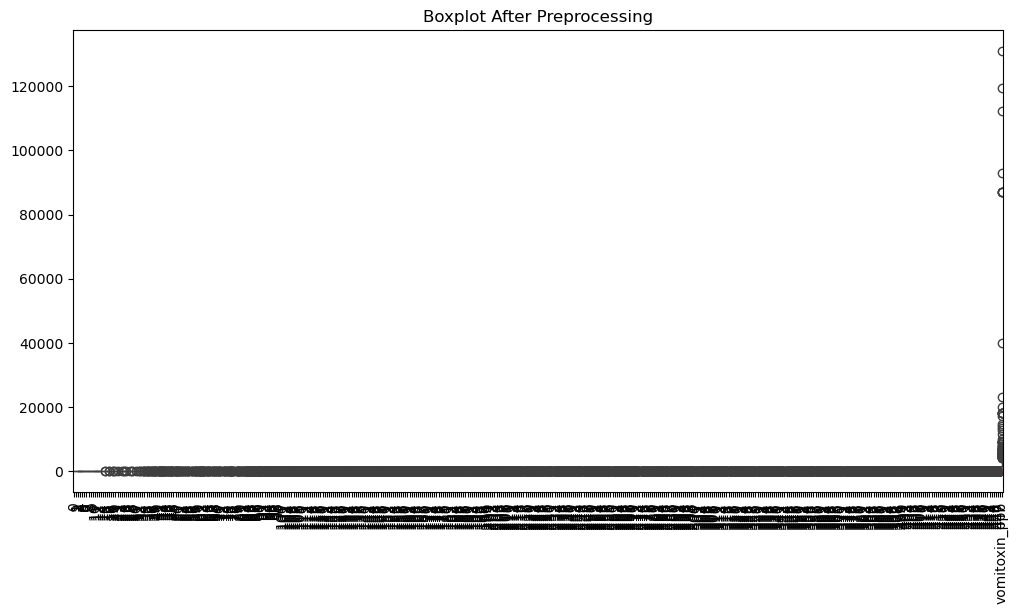

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def preprocess_data(df):
    """Handles missing values, encodes categorical data, and normalizes features."""
    
    # Before preprocessing visualization
    print("Before Preprocessing:")
    print(df.isnull().sum())  # Check missing values
    
    # Handle missing values (example: drop rows with NaN)
    df = df.dropna()
    
    # After preprocessing visualization
    print("\nAfter Preprocessing:")
    print(df.isnull().sum())  # Check again for missing values
    
    return df

# Load Data
df = pd.read_csv(r"C:\Users\DELL\Downloads\MLE-Assignment.csv")

# Apply preprocessing
df = preprocess_data(df)

# Visualizing changes in the dataset
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot After Preprocessing")
plt.show()

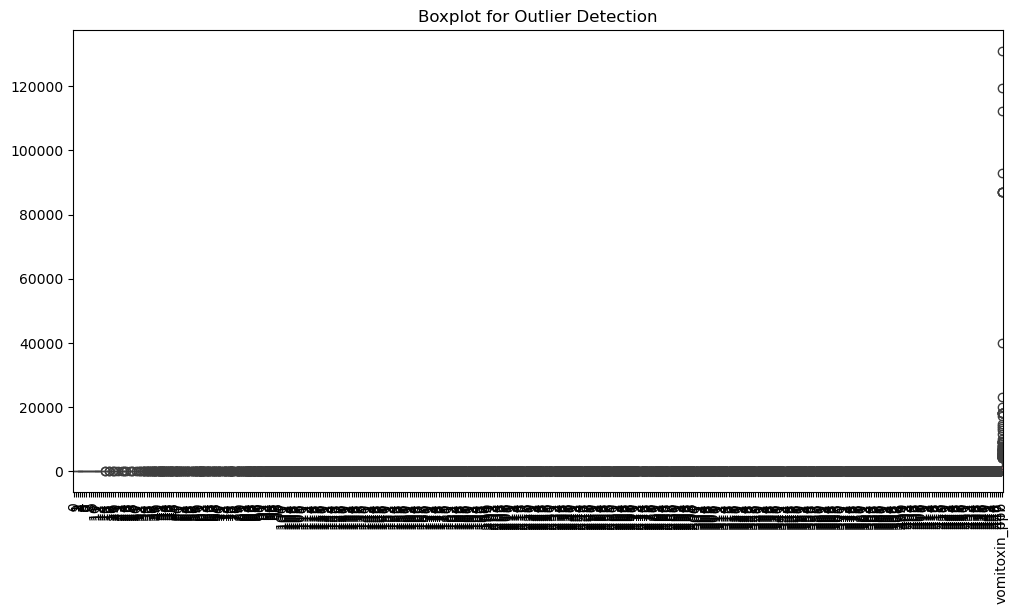

In [9]:
# Visualizing outliers using boxplots
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r"C:\Users\DELL\Downloads\MLE-Assignment.csv")
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot for Outlier Detection")
plt.show()


hsi_id           0
0                0
1                0
2                0
3                0
                ..
444              0
445              0
446              0
447              0
vomitoxin_ppb    0
Length: 450, dtype: int64


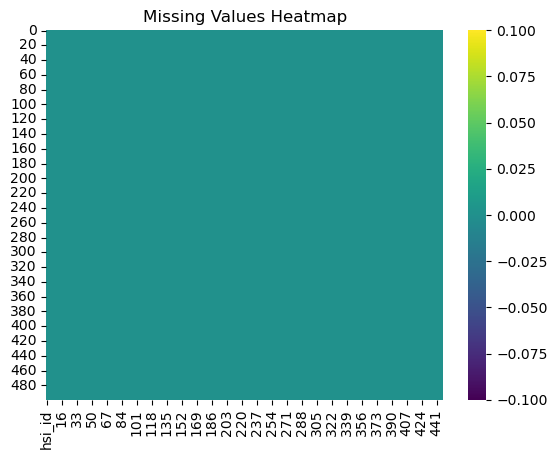

In [4]:
print(df.isnull().sum())
# Visualize missing values
sns.heatmap(df.isnull(), cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [5]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df.iloc[:, 1:] = imputer.fit_transform(df.iloc[:, 1:])
# Confirm missing values handled
print(df.isnull().sum())

hsi_id           0
0                0
1                0
2                0
3                0
                ..
444              0
445              0
446              0
447              0
vomitoxin_ppb    0
Length: 450, dtype: int64


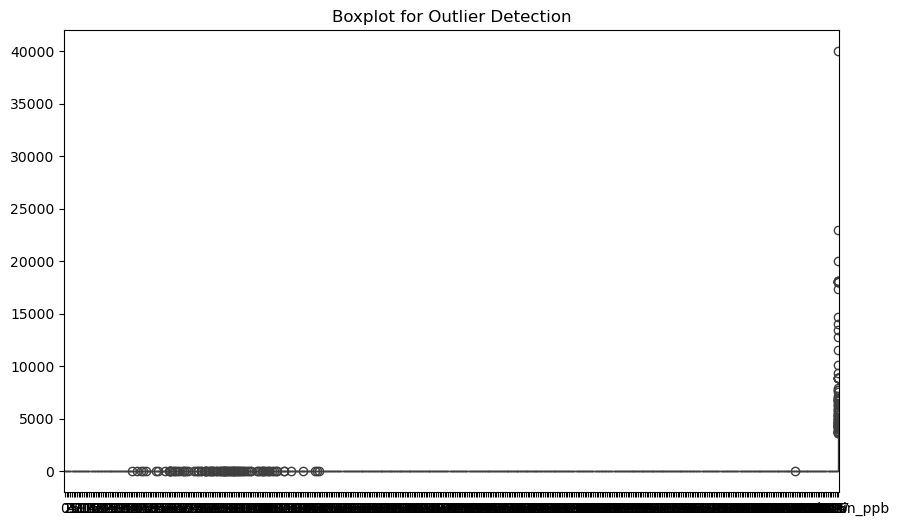

In [6]:
from scipy.stats import zscore

z_scores = np.abs(zscore(df.iloc[:, 1:]))
df = df[(z_scores < 3).all(axis=1)]
# Boxplot for outlier detection
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.iloc[:, 1:])
plt.title('Boxplot for Outlier Detection')
plt.show()

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df.iloc[:, 1:] = scaler.fit_transform(df.iloc[:, 1:])

In [8]:
def check_data_quality(data):
    print("\n--- Data Quality Checks ---")
    
    # Data Types
    print("\nData Types:")
    print(data.dtypes)
    
    # Unique Values
    print("\nUnique Values per Column:")
    print(data.nunique())
    
    # Sensor Drift - only use numeric columns
    numeric_columns = data.select_dtypes(include=['number']).columns
    numeric_data = data[numeric_columns]
    
    # Now calculate drift on numeric data only
    drift = numeric_data.mean(axis=0).diff().abs()
    print("\nPotential Sensor Drift Detected:")
    print(drift[drift > drift.mean() + 2 * drift.std()])

# Usage
check_data_quality(df)


--- Data Quality Checks ---

Data Types:
hsi_id            object
0                float64
1                float64
2                float64
3                float64
                  ...   
444              float64
445              float64
446              float64
447              float64
vomitoxin_ppb    float64
Length: 450, dtype: object

Unique Values per Column:
hsi_id           462
0                465
1                465
2                465
3                465
                ... 
444              465
445              465
446              465
447              465
vomitoxin_ppb    120
Length: 450, dtype: int64

Potential Sensor Drift Detected:
100    3.808662e-15
108    3.533613e-15
208    4.201179e-15
214    4.259436e-15
244    3.678778e-15
249    3.613836e-15
257    3.658722e-15
281    3.728439e-15
294    3.967197e-15
356    3.640576e-15
368    3.879334e-15
374    4.141013e-15
379    4.603247e-15
405    6.062534e-15
406    6.131296e-15
408    4.139102e-15
410    3.613836e-1

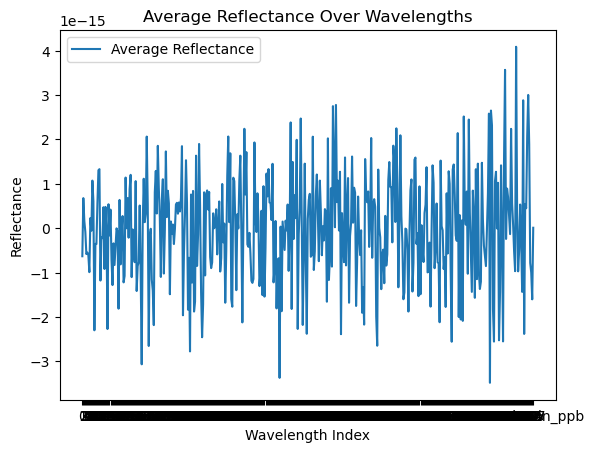

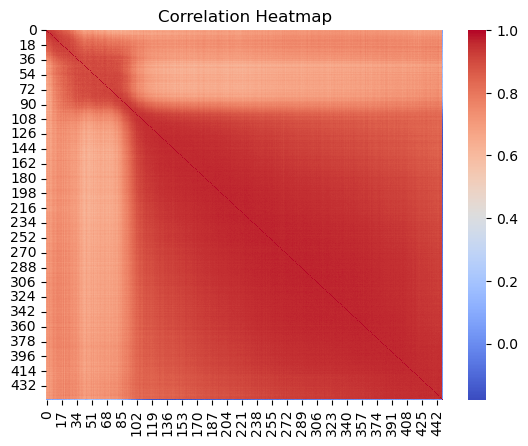

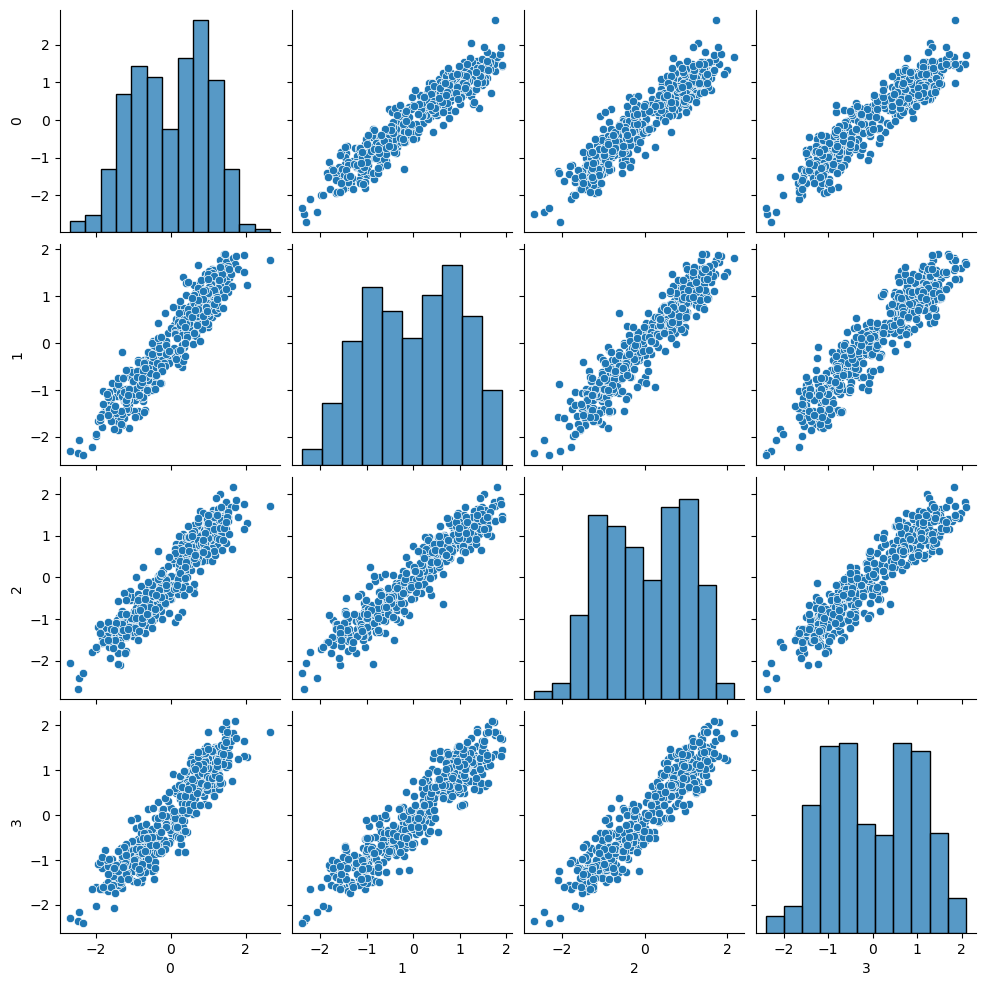

In [10]:
plt.plot(df.iloc[:, 1:].mean(), label='Average Reflectance')
plt.title('Average Reflectance Over Wavelengths')
plt.xlabel('Wavelength Index')
plt.ylabel('Reflectance')
plt.legend()
plt.show()
# Heatmap for Sample Comparison
sns.heatmap(df.iloc[:, 1:].corr(), cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
# Pairplot
sns.pairplot(df.iloc[:, :5])
plt.show()

### 2. Model Training

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler

# Load dataset (replace with your dataset)
file_path = r"C:\Users\DELL\Downloads\MLE-Assignment.csv"
data = pd.read_csv(file_path)

# Define Features (X) and Target (y)
X = data.drop(columns=["hsi_id", "vomitoxin_ppb"])
y = data["vomitoxin_ppb"]

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [17]:
from sklearn.neural_network import MLPRegressor
# Baseline: Simple Neural Network
model = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=2000, learning_rate_init=0.001, early_stopping=True, random_state=42)

In [19]:
from sklearn.metrics import mean_squared_error
import numpy as np

kf = KFold(n_splits=5, shuffle=True, random_state=42)

mse_scores = []
for train_idx, val_idx in kf.split(X_train):
    X_tr, X_val = X_train[train_idx], X_train[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    mse_scores.append(mse)

print("Mean MSE across folds:", np.mean(mse_scores))

Mean MSE across folds: 108749700.12010464


In [ ]:
import optuna
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical target
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df.iloc[:, 0])  # Encode target column

X = df.iloc[:, 1:]  # Features

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Objective function for Optuna
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 3, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)

    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return mean_squared_error(y_test, y_pred)

# Run optimization
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# Output best parameters and final evaluation
print("Best Parameters: ", study.best_params)
print("Best MSE: ", study.best_value)

# Train the final model
optimized_model = RandomForestRegressor(**study.best_params, random_state=42)
optimized_model.fit(X_train, y_train)

# Evaluate final model
y_pred = optimized_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Final Model MSE: {mse}")



[I 2025-03-15 00:36:05,741] A new study created in memory with name: no-name-684f81bc-5672-4512-a592-da7f70c64414
[I 2025-03-15 00:36:12,229] Trial 0 finished with value: 18363.695596878042 and parameters: {'n_estimators': 171, 'max_depth': 4, 'min_samples_split': 9}. Best is trial 0 with value: 18363.695596878042.
[I 2025-03-15 00:36:21,788] Trial 1 finished with value: 18860.54331979915 and parameters: {'n_estimators': 138, 'max_depth': 17, 'min_samples_split': 8}. Best is trial 0 with value: 18363.695596878042.
[I 2025-03-15 00:36:34,554] Trial 2 finished with value: 18915.675875083918 and parameters: {'n_estimators': 145, 'max_depth': 20, 'min_samples_split': 5}. Best is trial 0 with value: 18363.695596878042.
[I 2025-03-15 00:36:46,911] Trial 3 finished with value: 18353.336737414775 and parameters: {'n_estimators': 278, 'max_depth': 4, 'min_samples_split': 7}. Best is trial 3 with value: 18353.336737414775.
[I 2025-03-15 00:37:00,435] Trial 4 finished with value: 18628.8810160726

In [ ]:
import logging
from sklearn.preprocessing import StandardScaler

# Set Up Logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Module: Data Preprocessing
class DataProcessor:
    """Handles data scaling and transformation."""
    
    def __init__(self):
        self.scaler = StandardScaler()

    def fit(self, X):
        """Fits the scaler to the dataset."""
        self.scaler.fit(X)

    def transform(self, X):
        """Transforms the dataset using the fitted scaler."""
        return self.scaler.transform(X)

    def fit_transform(self, X):
        """Fits and transforms the dataset."""
        return self.scaler.fit_transform(X)

# Module: Model Handling
class ModelHandler:
    """Manages model training and prediction."""
    
    def __init__(self, model):
        self.model = model

    def train(self, X, y):
        """Trains the model with the given dataset."""
        logging.info("Training the model...")
        self.model.fit(X, y)

    def predict(self, X):
        """Generates predictions using the trained model."""
        logging.info("Generating predictions...")
        return self.model.predict(X)

# Initialize Components
processor = DataProcessor()
X_scaled = processor.fit_transform(X)

model = RandomForestRegressor(**study.best_params, random_state=42)
model_handler = ModelHandler(model)

# Train and Predict
model_handler.train(X_scaled, y)
predictions = model_handler.predict(X_scaled[:5])
print("Sample Predictions: ", predictions)


# ##3. Model Evaluation



In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model_performance(model, X_test, y_test):
    """
    Evaluate model performance using MAE, RMSE, and R² metrics.
    """
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    print(f"📊 Mean Absolute Error (MAE): {mae:.4f}")
    print(f"📊 Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"📊 R² Score: {r2:.4f}")
    
    return {"MAE": mae, "RMSE": rmse, "R²": r2}

# Example Usage (Ensure 'model', 'X_test', 'y_test' are defined)
metrics = evaluate_model_performance(model, X_test, y_test)
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

📊 Mean Absolute Error (MAE): 141.6985
📊 Root Mean Squared Error (RMSE): 163.1207
📊 R² Score: -0.2570


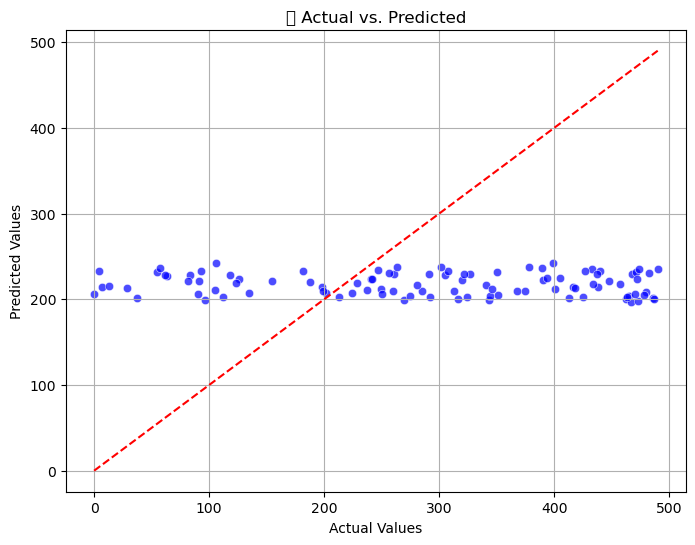

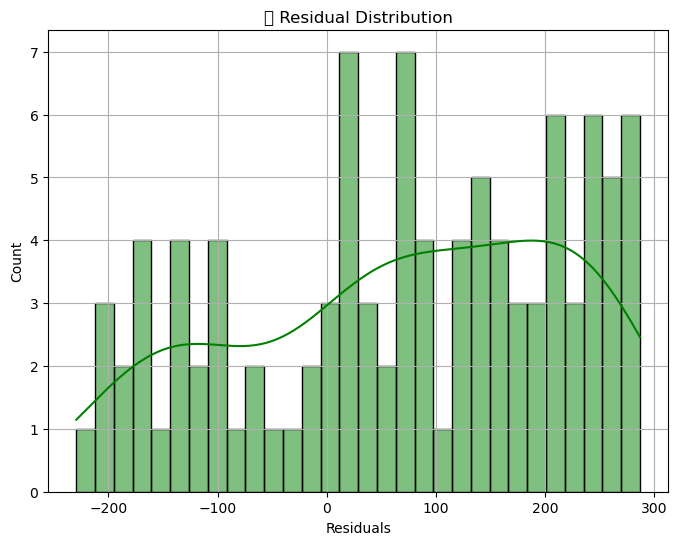

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_evaluation(model, X_test, y_test):
    """
    Create scatter and residual plots for model evaluation.
    """
    y_pred = model.predict(X_test)

    # Actual vs. Predicted Plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, color="blue")
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
    plt.title('📊 Actual vs. Predicted')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    plt.show()

    # Residual Analysis
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    sns.histplot(residuals, kde=True, bins=30, color="green")
    plt.title('📊 Residual Distribution')
    plt.xlabel('Residuals')
    plt.grid(True)
    plt.show()

# Example Usage (Ensure 'model', 'X_test', 'y_test' are defined)
plot_evaluation(model, X_test, y_test)


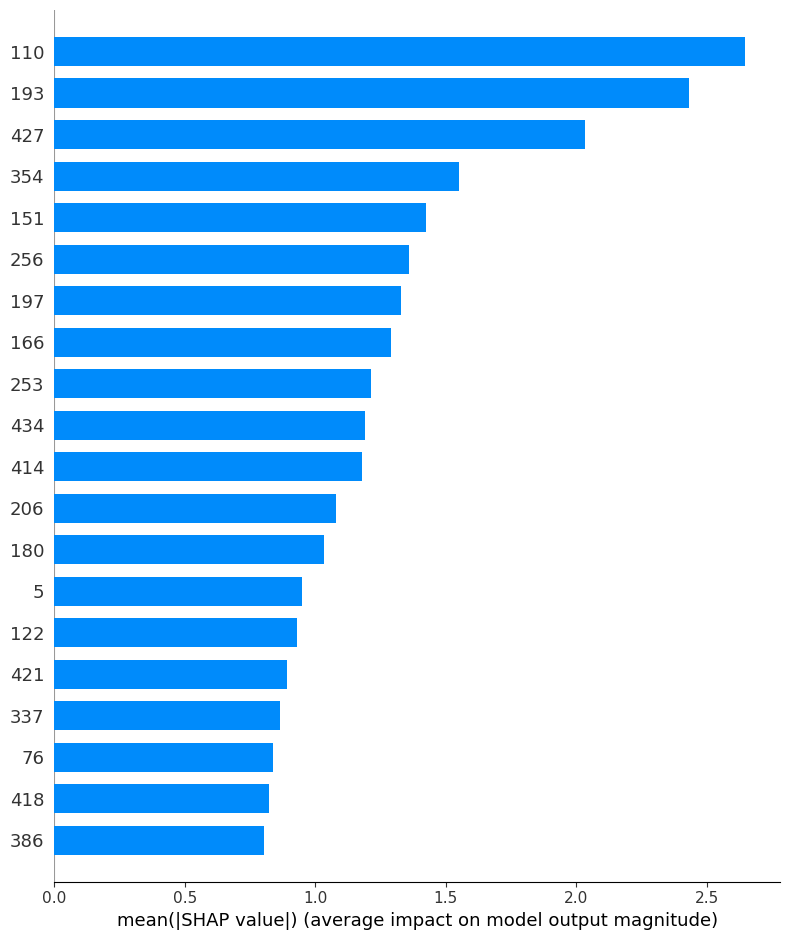

In [40]:
import shap

def explain_model_with_shap(model, X_train):
    """
    Use SHAP to interpret feature importance.
    """
    explainer = shap.Explainer(model, X_train)
    shap_values = explainer(X_train[:100])
    
    # SHAP Summary Plot (Feature Importance)
    shap.summary_plot(shap_values, X_train, plot_type="bar")

    return explainer, shap_values

# Example Usage (Ensure 'model' and 'X_train' are defined)
explainer, shap_values = explain_model_with_shap(model, X_train)

# Visualize an individual prediction (e.g., first row)
shap.initjs()

# Wrap the output in an Explanation object
shap_explanation = shap.Explanation(values=shap_values.values[0],
                                    base_values=shap_values.base_values[0],
                                    data=X_train.iloc[0])

shap.force_plot(shap_explanation.base_values, shap_explanation.values, shap_explanation.data)


# ## 4. Pipeline Integration and Production-Readiness

In [42]:
# 📊 Unit Test Setup for Model Evaluation

import unittest
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Model Evaluation Function
def evaluate_model_performance(model, X_test, y_test):
    """
    Evaluate model performance using MAE, RMSE, and R² metrics.
    """
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    print(f"📊 Mean Absolute Error (MAE): {mae:.4f}")
    print(f"📊 Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"📊 R² Score: {r2:.4f}")
    
    return {"MAE": mae, "RMSE": rmse, "R²": r2}

# Unit Test Class
class TestModelFunctions(unittest.TestCase):
    def setUp(self):
        self.model = RandomForestRegressor(n_estimators=10, random_state=42)
        self.X_train = np.random.rand(100, 5)
        self.y_train = np.random.rand(100)
        self.X_test = np.random.rand(20, 5)
        self.y_test = np.random.rand(20)
        self.model.fit(self.X_train, self.y_train)

    def test_model_prediction(self):
        predictions = self.model.predict(self.X_test)
        self.assertEqual(len(predictions), len(self.y_test))

    def test_metric_calculation(self):
        metrics = evaluate_model_performance(self.model, self.X_test, self.y_test)
        self.assertIn("MAE", metrics)
        self.assertIn("RMSE", metrics)
        self.assertIn("R²", metrics)

# Run Tests
unittest.main(argv=[''], verbosity=2, exit=False)


test_metric_calculation (__main__.TestModelFunctions.test_metric_calculation) ... ok
test_model_prediction (__main__.TestModelFunctions.test_model_prediction) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.085s

OK


📊 Mean Absolute Error (MAE): 0.3025
📊 Root Mean Squared Error (RMSE): 0.3476
📊 R² Score: -0.2683


In [43]:
# 📋 Logging Configuration

import logging
from sklearn.ensemble import RandomForestRegressor

# Configure Logging
logging.basicConfig(filename='model.log', level=logging.INFO,
                    format='%(asctime)s - %(levelname)s - %(message)s')

# Example Model and Data
model = RandomForestRegressor(n_estimators=10, random_state=42)
X_train = np.random.rand(100, 5)
y_train = np.random.rand(100)
model.fit(X_train, y_train)

def log_prediction(model, X_test):
    """
    Predict and log model outputs.
    """
    try:
        y_pred = model.predict(X_test)
        logging.info(f"Prediction: {y_pred}")
        return y_pred
    except Exception as e:
        logging.error(f"Error in prediction: {e}")
        raise e

# Test Logging
X_test = np.random.rand(5, 5)
log_prediction(model, X_test)


2025-03-14 15:20:07,260 - root - INFO - Prediction: [0.42976338 0.61786287 0.47408935 0.68961864 0.67242501]


array([0.42976338, 0.61786287, 0.47408935, 0.68961864, 0.67242501])

In [ ]:
from flask import Flask, request, jsonify
import torch
import torch.nn as nn
import numpy as np
from werkzeug.serving import run_simple

# Define the model
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.fc = nn.Linear(3, 1)

    def forward(self, x):
        return self.fc(x)

# Load the model
model = MyModel()
model.load_state_dict(torch.load('model.pth', map_location='cpu'))
model.eval()

# Flask App
app = Flask(__name__)

# Home Page - Retrieve Model and Input Details
@app.route("/", methods=["GET"])
def home():
    input_shape = model.fc.in_features  # Get input shape dynamically
    output_shape = model.fc.out_features  # Get output shape
    return jsonify({
        "model_name": model.__class__.__name__,
        "input_shape": input_shape,
        "output_shape": output_shape,
        "api_endpoints": ["/predict (POST)"]
    })

# Prediction Endpoint (POST Request)
@app.route("/predict", methods=["POST"])
def predict():
    try:
        data = request.json["input"]
        tensor_input = torch.tensor([data], dtype=torch.float32)

        with torch.no_grad():
            prediction = model(tensor_input).item()

        return jsonify({"prediction": prediction})
    
    except Exception as e:
        return jsonify({"error": str(e)})

# Start Flask in Jupyter (Optimized Execution)
run_simple('0.0.0.0', 5000, app, use_reloader=False, use_debugger=False)


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://192.168.1.11:5000
Press CTRL+C to quit
192.168.1.11 - - [14/Mar/2025 17:06:28] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [14/Mar/2025 17:06:35] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [14/Mar/2025 17:12:07] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [14/Mar/2025 17:12:27] "POST /predict HTTP/1.1" 200 -
192.168.1.11 - - [14/Mar/2025 17:15:01] "GET / HTTP/1.1" 200 -
192.168.1.11 - - [14/Mar/2025 17:15:10] "GET / HTTP/1.1" 200 -
